Dataset loaded successfully.
Initial dataset shape: (1692, 6)
Dataset shape after cleaning: (1692, 6)
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<ipython-input-24-244b1d8773ec>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
<ipython-input-24-244b1d8773ec>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')


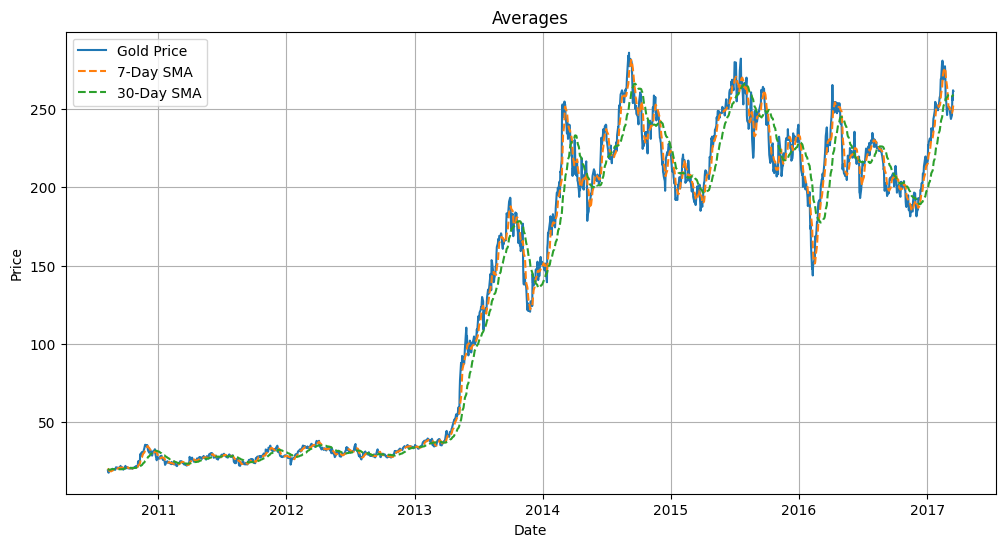

Processed dataset preview:
                  Open       High        Low      Close   Volume  Adj Close  \
Date                                                                         
2010-08-10  19.650000  19.650000  18.820000  19.030001  1281300  19.030001   
2010-08-11  18.690001  18.879999  17.850000  17.900000   797600  17.900000   
2010-08-12  17.799999  17.900000  17.389999  17.600000   691000  17.600000   
2010-08-13  18.180000  18.450001  17.660000  18.320000   634000  18.320000   
2010-08-16  18.450001  18.799999  18.260000  18.780001   485800  18.780001   

                SMA_7     SMA_30      Lag_1      Lag_7  
Date                                                    
2010-08-10  20.400000  20.041333  19.600000  19.940001  
2010-08-11  19.968572  19.841667  19.030001  20.920000  
2010-08-12  19.347143  19.634000  17.900000  21.950001  
2010-08-13  18.927143  19.512667  17.600000  21.260000  
2010-08-16  18.688572  19.498667  18.320000  20.450001  


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    try:
        data = pd.read_csv(filepath, parse_dates=True, index_col='Date')
        print("Dataset loaded successfully.")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def clean_data(data):
    print("Initial dataset shape:", data.shape)
    data = data.drop_duplicates()
    data = data.fillna(method='ffill')
    data = data.fillna(method='bfill')
    data = data.dropna()
    print("Dataset shape after cleaning:", data.shape)
    return data

def preprocess_time_series(data):
    print("Index type:", type(data.index))
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)
    data = data.sort_index()
    return data

def feature_engineering(data):
    data['SMA_7'] = data['Close'].rolling(window=7).mean()
    data['SMA_30'] = data['Close'].rolling(window=30).mean()
    data['Lag_1'] = data['Close'].shift(1)
    data['Lag_7'] = data['Close'].shift(7)
    data = data.dropna()
    return data

def visualize_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Gold Price')
    plt.plot(data['SMA_7'], label='7-Day SMA', linestyle='--')
    plt.plot(data['SMA_30'], label='30-Day SMA', linestyle='--')
    plt.title('Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

def main():
    filepath = "/content/TSA.csv" # Change path if needed
    data = load_data(filepath)
    if data is None:
        return
    data = clean_data(data)
    data = preprocess_time_series(data)
    data = feature_engineering(data)
    visualize_data(data)
    print("Processed dataset preview:\n", data.head())

if __name__ == "__main__":
    main()
